In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
data =pd.read_csv('/content/SQL data.csv')

In [29]:
data=data.drop(data.columns[0], axis=1)

In [30]:
data.head()

,description,reviews,Price,discount,Brand,TV_Size,TV_Type,TV_Pixels
0,Amazon Echo Show 10 with Alexa - Charcoal,(1167 Reviews),$249.99,$80,Amazon Echo,NaN,NaN,NaN
1,Amazon Echo (4th Gen) Smart Home Hub with Alex...,(441 Reviews),$94.99,$20,Amazon Echo,NaN,NaN,NaN
2,Samsung 55 4K UHD HDR LED Tizen Smart TV (UN55...,(40 Reviews),$599.99,15.5,Samsung,LED,55.0,4K
3,Samsung 43 4K UHD HDR LED Tizen Smart TV (UN43...,(1015 Reviews),$399.99,12.2,Samsung,LED,43.0,4K
4,Samsung The Frame 65 4K UHD HDR QLED Tizen Sma...,(418 Reviews),"$2,299.99",$400,Samsung,LED,65.0,4K


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  1642 non-null   object 
 1   reviews      1640 non-null   object 
 2   Price        1622 non-null   object 
 3   discount     1428 non-null   object 
 4   Brand        1642 non-null   object 
 5   TV_Size      1560 non-null   object 
 6   TV_Type      1556 non-null   float64
 7   TV_Pixels    1486 non-null   object 
dtypes: float64(1), object(7)
memory usage: 102.8+ KB


In [32]:
data.isna().sum()

description      0
reviews          2
Price           20
discount       214
Brand            0
TV_Size         82
TV_Type         86
TV_Pixels      156
dtype: int64

In [33]:
data.isnull().sum(axis=1)

0       3
1       3
2       0
3       0
4       0
       ..
1637    0
1638    0
1639    0
1640    3
1641    3
Length: 1642, dtype: int64

In [34]:
#data = data[data.isnull().sum(axis=1) < 2]

In [35]:
data.isna().sum()

description      0
reviews          2
Price           20
discount       214
Brand            0
TV_Size         82
TV_Type         86
TV_Pixels      156
dtype: int64

In [36]:
data.discount = data.discount.fillna(0)

In [37]:
data.TV_Size.unique()

array([nan, 'LED', 'OLED', 'QNED', 'LCD'], dtype=object)

In [38]:
data.TV_Type.unique()


array([ nan,  55.,  43.,  65.,  58.,  32.,  50.,  40.,  42.,  70.,  75.,
        77.,  85.,  82.,  48.,  86.,  24.,  98., 100.,  83.,  60.,  22.,
        49.,  19.,  46.,  37.,   7.,   6.])

In [39]:
data.TV_Pixels.unique()

array([nan, '4K', '1080p', '720p', 'Ultra HD'], dtype=object)

Handling missing values

In [40]:
missing_data = data[data['TV_Size'].isna() | data['TV_Type'].isna() | data['TV_Pixels'].isna()]

In [41]:
missing_data.head()

,description,reviews,Price,discount,Brand,TV_Size,TV_Type,TV_Pixels
0,Amazon Echo Show 10 with Alexa - Charcoal,(1167 Reviews),$249.99,$80,Amazon Echo,NaN,NaN,NaN
1,Amazon Echo (4th Gen) Smart Home Hub with Alex...,(441 Reviews),$94.99,$20,Amazon Echo,NaN,NaN,NaN
5,Explore Sonyâs full TV lineup.,NaN,NaN,15.5,Sony,NaN,NaN,NaN
27,Amazon Echo Show 10 with Alexa - Glacier White,(1163 Reviews),$249.99,$35,Amazon Echo,NaN,NaN,NaN
28,Amazon Echo (4th Gen) Smart Home Hub with Alex...,(1209 Reviews),$94.99,15.5,Amazon Echo,NaN,NaN,NaN


In [42]:
missing_data.shape

(242, 8)

In [43]:
missing_data.isna().sum()

description      0
reviews          2
Price           14
discount         0
Brand            0
TV_Size         82
TV_Type         86
TV_Pixels      156
dtype: int64

In [44]:
tv_type_pattern = r'\b(\d+)(?=\s?(?:inch|inches)?)\b'
tv_pixels_pattern = r'(?i)\b\s*(4K|8K|1080p|720p|Ultra\s?HD)\s*\b'

In [45]:
missing_data.loc[missing_data['TV_Type'].isna(), 'TV_Type'] = missing_data.loc[missing_data['TV_Type'].isna(), 'description'].str.extract(tv_type_pattern)
missing_data['TV_Type'] = missing_data['TV_Type'].astype(float)

<ipython-input-45-d9e63635551a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['TV_Type'] = missing_data['TV_Type'].astype(float)


In [46]:
missing_tv_pixels = missing_data[missing_data['TV_Pixels'].isna()].copy()
missing_tv_pixels['TV_Pixels'] = missing_tv_pixels['description'].str.extract(tv_pixels_pattern)

In [47]:
missing_tv_pixels.dropna(inplace=True)

In [48]:
missing_data.loc[missing_tv_pixels.index, 'TV_Pixels'] = missing_tv_pixels['TV_Pixels']

In [49]:
missing_data.isna().sum()

description     0
reviews         2
Price          14
discount        0
Brand           0
TV_Size        82
TV_Type        86
TV_Pixels      76
dtype: int64

In [50]:
missing_data.dropna(inplace=True)

<ipython-input-50-311340f41f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data.dropna(inplace=True)


In [51]:
data['TV_Type'] = data['TV_Type'].combine_first(missing_data['TV_Type'])

In [52]:
data['TV_Pixels'] = data['TV_Pixels'].combine_first(missing_data['TV_Pixels'])

In [53]:
data.dropna(inplace=True)

In [54]:
data['Price'] = data['Price'].str.replace('[\$,]', '', regex=True).astype(float)

In [55]:
data['discount'] = data['discount'].str.replace('[\$,]', '', regex=True).astype(float)

In [56]:
data['reviews'] = data['reviews'].str.replace(r'\D', '').astype(int)

<ipython-input-56-1ea64ad273bc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews'] = data['reviews'].str.replace(r'\D', '').astype(int)


Visuals

In [57]:
pip install matplotlib seaborn

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data.dtypes

description     object
reviews          int64
Price          float64
discount       float64
Brand           object
TV_Size         object
TV_Type        float64
TV_Pixels       object
dtype: object

In [60]:
data.head(2)

,description,reviews,Price,discount,Brand,TV_Size,TV_Type,TV_Pixels
2,Samsung 55 4K UHD HDR LED Tizen Smart TV (UN55...,40,599.99,15.5,Samsung,LED,55.0,4K
3,Samsung 43 4K UHD HDR LED Tizen Smart TV (UN43...,1015,399.99,12.2,Samsung,LED,43.0,4K


In [61]:
data['discount'] = data['discount'].astype(float)
data['TV_Type'] = data['TV_Type'].astype(float)


<ipython-input-62-9fa67090a602>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


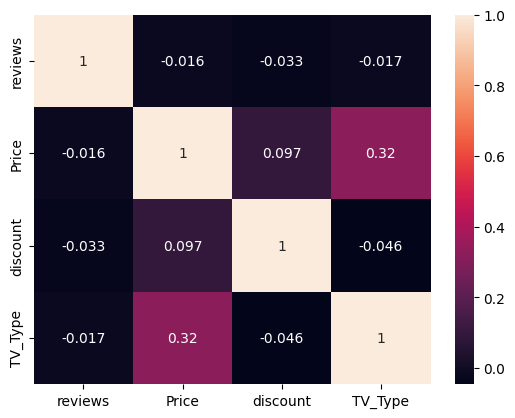

In [62]:
sns.heatmap(data.corr(), annot=True)
plt.show()

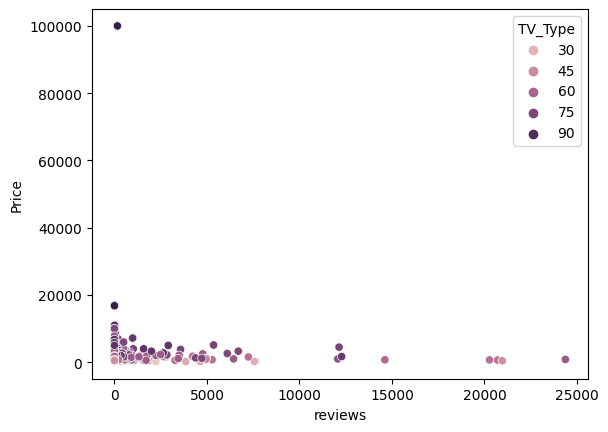

In [63]:
sns.scatterplot(x='reviews', y='Price', hue='TV_Type', data=data)
plt.show()

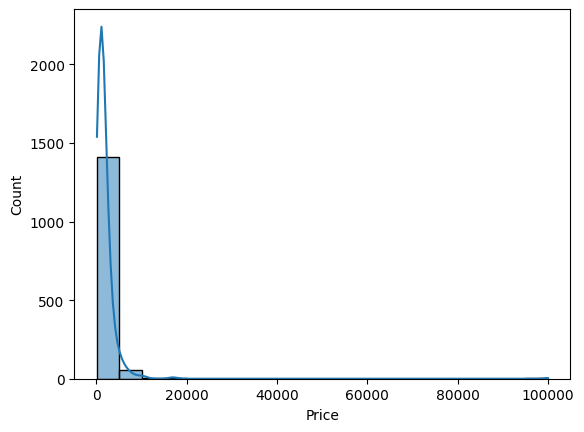

In [64]:
sns.histplot(data['Price'], bins=20, kde=True)
plt.show()

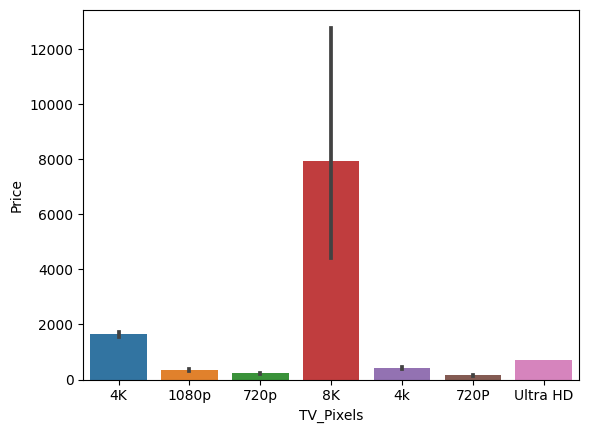

In [65]:
sns.barplot(x='TV_Pixels', y='Price', data=data)
plt.show()

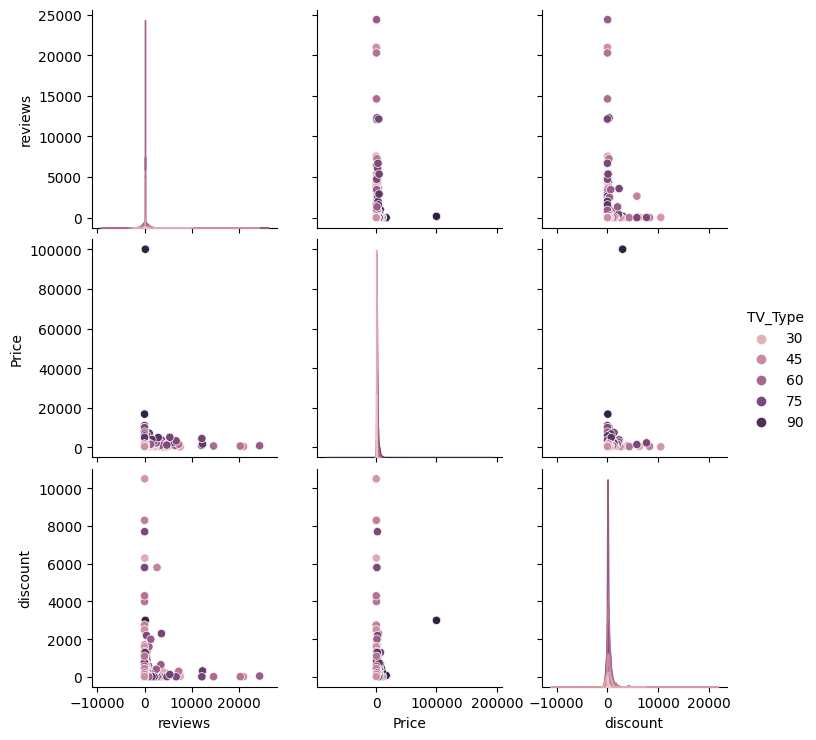

In [66]:
sns.pairplot(data[['reviews', 'Price', 'discount', 'TV_Size', 'TV_Type']], diag_kind='kde', markers='o', hue='TV_Type')
plt.show()

Removing Outliers

In [67]:
rows_above_90k = data[data['Price'] > 90000]
print(rows_above_90k)

                                           description  reviews     Price  \
162  Samsung 98 8K UHD HDR QLED Tizen Smart TV (QN9...      161  99999.99   
985  Samsung 98 8K UHD HDR QLED Tizen Smart TV (QN9...      161  99999.99   

     discount                 Brand TV_Size  TV_Type TV_Pixels  
162    3000.0  Samsung                  LED     98.0        8K  
985    3000.0  Samsung                  LED     98.0        8K  


In [68]:
data = data.drop([162, 985])

In [69]:
data1 = data[['Price', 'TV_Type']]

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

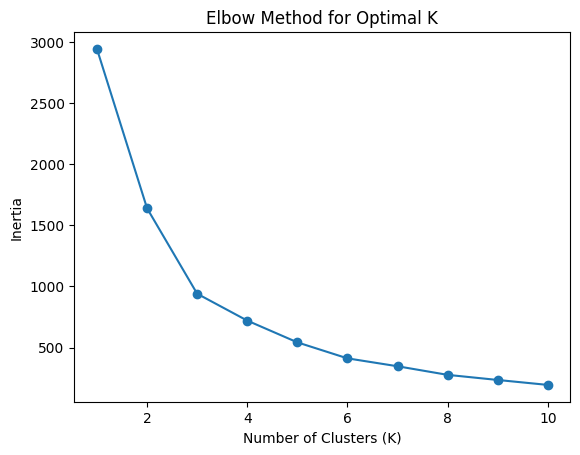

In [72]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [73]:
# From the elbow plot, choose the number of clusters (K) and perform K-means clustering
k = 6  # Choose the optimal K from the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [74]:
data1['Cluster'] = kmeans.labels_
data['Cluster'] = kmeans.labels_

<ipython-input-74-1134392f3b02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster'] = kmeans.labels_


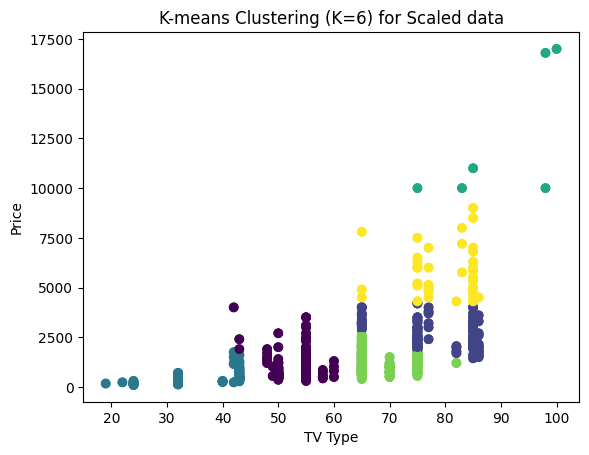

In [75]:
plt.scatter(data1['TV_Type'], data1['Price'], c=data1['Cluster'], cmap='viridis')
plt.xlabel('TV Type')
plt.ylabel('Price')
plt.title(f'K-means Clustering (K={k}) for Scaled data')
plt.show()

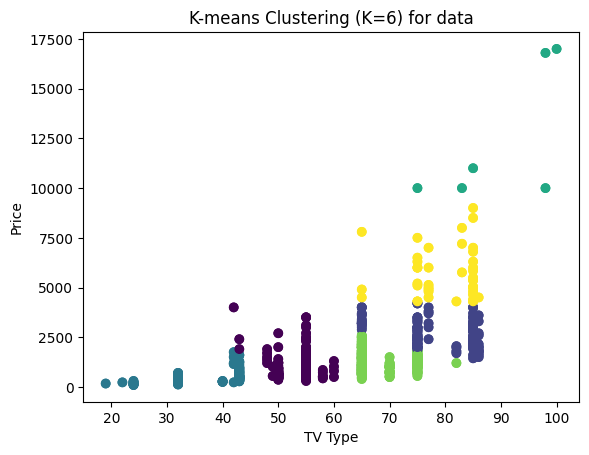

In [76]:
plt.scatter(data['TV_Type'], data['Price'], c=data['Cluster'], cmap='viridis')
plt.xlabel('TV Type')
plt.ylabel('Price')
plt.title(f'K-means Clustering (K={k}) for data')
plt.show()

Cluster Depiction

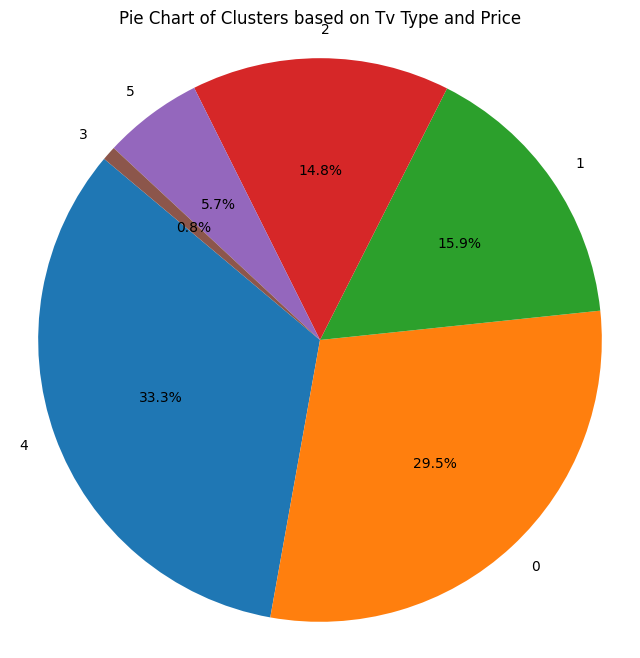

In [77]:
count = data['Cluster'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Clusters based on Tv Type and Price')
plt.axis('equal')
plt.show()

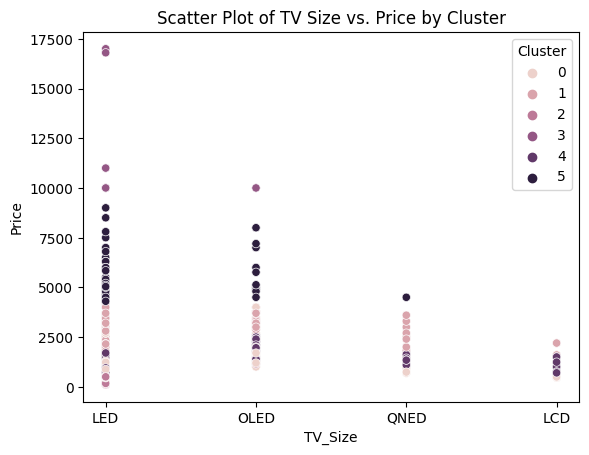

In [78]:
sns.scatterplot(data=data, x='TV_Size', y='Price', hue='Cluster')
plt.title('Scatter Plot of TV Size vs. Price by Cluster')
plt.show()

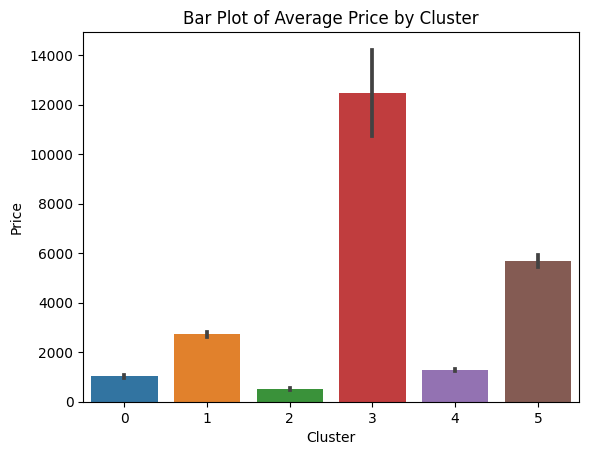

In [79]:
sns.barplot(data=data, x='Cluster', y='Price')
plt.title('Bar Plot of Average Price by Cluster')
plt.show()

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [81]:
data.head()

,description,reviews,Price,discount,Brand,TV_Size,TV_Type,TV_Pixels,Cluster
2,Samsung 55 4K UHD HDR LED Tizen Smart TV (UN55...,40,599.99,15.5,Samsung,LED,55.0,4K,0
3,Samsung 43 4K UHD HDR LED Tizen Smart TV (UN43...,1015,399.99,12.2,Samsung,LED,43.0,4K,2
4,Samsung The Frame 65 4K UHD HDR QLED Tizen Sma...,418,2299.99,400.0,Samsung,LED,65.0,4K,4
6,Samsung 65 4K UHD HDR LED Tizen Smart TV (UN65...,24374,849.99,50.0,Samsung,LED,65.0,4K,4
7,Samsung 55 4K UHD HDR LED Tizen Smart TV (UN55...,157,699.99,15.5,Samsung,LED,55.0,4K,0


In [82]:
data.Brand.unique()

array(['Samsung             ', 'Sony                ',
       'LG                  ', 'Toshiba             ',
       'NA                  ', 'Hisense             ',
       'Amazon fire TV      ', 'Insignia            ',
       'TCL 75              ', 'VIZIO               ',
       'Philips 75          ', 'TCL 6Series 65      ',
       'RCA 32              ', 'JVC 58              '], dtype=object)

In [83]:
pixel_map = {
    '4K': 0,
    '1080p': 1,
    '720p': 2,
    '8K': 3,
    '4k': 4,
    '720P': 5,
    'Ultra HD': 6
}
data['TV_Pixels'] = data['TV_Pixels'].map(pixel_map)

In [84]:
brand_map = {
    'Samsung             ': 0,
    'Sony                ': 1,
    'LG                  ': 2,
    'Toshiba             ': 3,
    'NA                  ': 4,
    'Hisense             ': 5,
    'Amazon fire TV      ': 6,
    'Insignia            ': 7,
    'TCL 75              ': 8,
    'VIZIO               ': 9,
    'Philips 75          ': 10,
    'TCL 6Series 65      ': 11,
    'RCA 32              ': 12,
    'JVC 58              ': 13
}

data['Brand'] = data['Brand'].map(brand_map)

In [85]:
X = data[['TV_Type','TV_Pixels','Brand']]
y = data['Price']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [88]:
y_pred = decision_tree.predict(X_test)

In [89]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.8013344372542037


type , pixels -> 0.7945 type, brand -> 0.719  type, brand, pixel -> 0.795

Model using Scaled Features

In [90]:
X1 = data1[['TV_Type','Cluster']]
y1 = data1['Price']

In [91]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [92]:
decision_tree1 = DecisionTreeRegressor(random_state=42)
decision_tree1.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=42)

In [93]:
y_pred1 = decision_tree1.predict(X_test1)

In [94]:
accuracy = r2_score(y_test1, y_pred1)
print(accuracy)

0.8817377335279933


Perform Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
cv_scores = cross_val_score(decision_tree, X, y, cv=5)
cv_scores1 = cross_val_score(decision_tree1, X1, y1, cv=5)

In [97]:
print("Cross-Validation Scores for non clustered data:", cv_scores)
print("Mean Accuracy for non clustered data:", cv_scores.mean())

Cross-Validation Scores for non clustered data: [0.82442163 0.58753821 0.69495793 0.79989258 0.6015048 ]
Mean Accuracy for non clustered data: 0.7016630316636171


In [98]:
print("Cross-Validation Scores for clustered data:", cv_scores1)
print("Mean Accuracy for clustered data:", cv_scores1.mean())

Cross-Validation Scores for clustered data: [0.90391703 0.84848763 0.80955516 0.90949148 0.85283509]
Mean Accuracy for clustered data: 0.8648572778491521


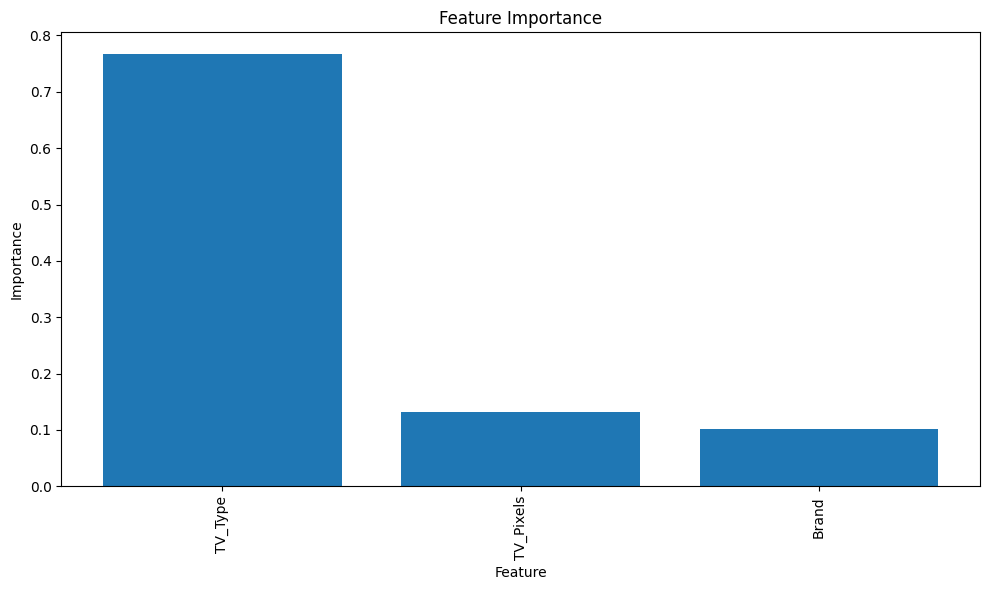

In [99]:
feature_importance = decision_tree.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding column names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

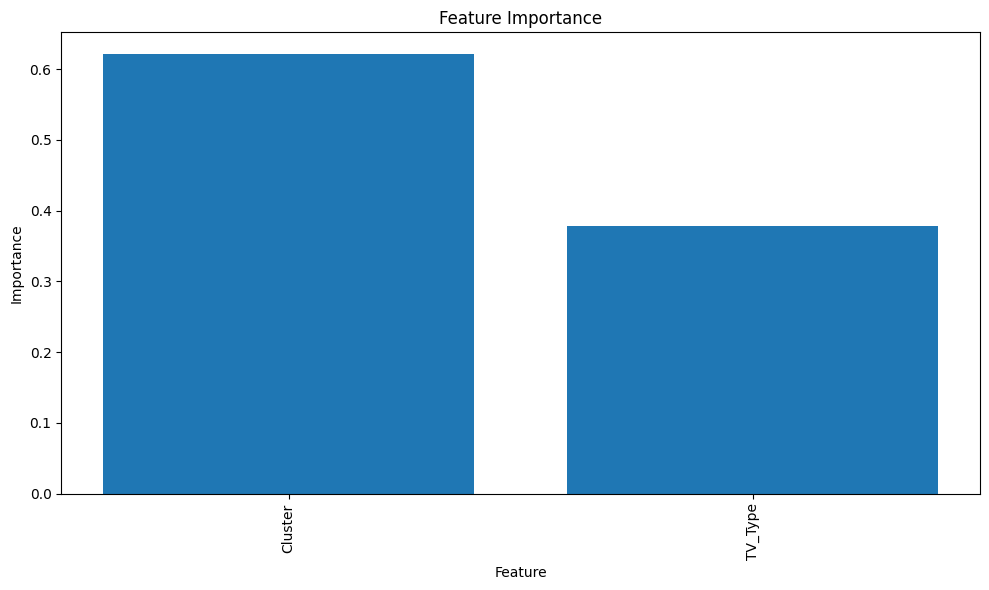

In [100]:
feature_importance = decision_tree1.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding column names
importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

By Applying Cluster from data1 and applying it to data

In [101]:
X12 = data[['TV_Type','TV_Pixels','Brand','Cluster']]
y12 = data['Price']
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.2, random_state=42)
decision_tree12 = DecisionTreeRegressor(random_state=42)
decision_tree12.fit(X_train12, y_train12)
y_pred12 = decision_tree12.predict(X_test12)
accuracy = r2_score(y_test12, y_pred12)
print(accuracy)

0.9061104595068785


In [102]:
cv_scores12 = cross_val_score(decision_tree12, X12, y12, cv=5)
print(cv_scores12.mean())

0.8892904955770801


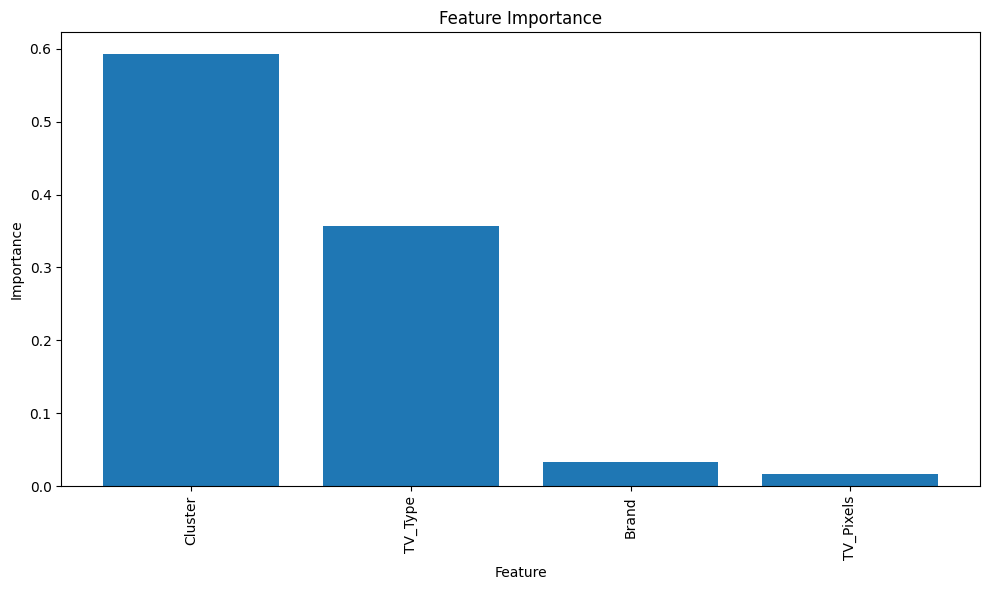

In [103]:
feature_importance = decision_tree12.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding column names
importance_df = pd.DataFrame({'Feature': X12.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This is the best method to predict the Price.

In [104]:
import joblib
model_filename = 'decision_tree_model.joblib'
joblib.dump(decision_tree12, model_filename)

['decision_tree_model.joblib']

Input: 'TV_Type','TV_Pixels','Brand','Cluster'
Output: Price
model name: ['decision_tree_model.joblib']


For real time purpose, the other model without cluster is suggested,
With
Input: 'TV_Type','TV_Pixels','Brand'
Output:Price
model name: prediction.joblib

In [105]:
model_filename = 'prediction.joblib'
joblib.dump(decision_tree, model_filename)

['prediction.joblib']